Breast Cancer - Logistic Regression 

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA


In [215]:
df = pd.read_csv("data.csv")
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df.head()

/tmp/ipykernel_1173716/399647377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
/tmp/ipykernel_1173716/399647377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [216]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [218]:
df = df.drop('Unnamed: 32', axis=1)

In [219]:
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('Percent of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('Percent of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

Percent of cells labeled Benign 62.74 %
Percent of cells labeled Malignant 37.26 %


In [ ]:
correlation = df.corr()
cor_col = correlation.columns.tolist()
plt.figure(figsize=[8,8])
sns.heatmap(correlation,cmap='RdYlBu',linewidths=0.05,linecolor='white')
plt.title('correlation between different features')
plt.show()

In [221]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 31)
Shape of test set: (114, 31)


In [222]:
ss = StandardScaler() #standardizes a feature
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [223]:
logreg = LogisticRegression() #train model
logreg.fit(X_train, y_train)

predictions1 = logreg.predict(X_test) #predictions for the test set


In [224]:
#Accuracy of model 
logreg_acc = accuracy_score(y_test, predictions1)
print(f"Accuracy of the Logistic Regression Model: {logreg_acc}")

Accuracy of the Logistic Regression Model: 0.9824561403508771


In [225]:
#Number of benign and malignant points
benign_points = sum(y_test == 1)
malignant_points = sum(y_test == 0)
print(f"Benign points in test set: {benign_points}")
print(f"Malignant points in test set: {malignant_points}")

Benign points in test set: 43
Malignant points in test set: 71


In [226]:
correct_predictions = sum(y_test == predictions1) #analyze correct vs incorrect predictions 
incorrect_predictions = sum(y_test != predictions1)
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Model prediction accuracy: {round(correct_predictions / len(y_test) * 100, 2)}%")


Correct predictions: 112
Incorrect predictions: 2
Model prediction accuracy: 98.25%


In [ ]:
X = df.drop('diagnosis', axis=1)  #select all features 
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)   #use PCA to reduce the dataset to 2 principal components  
X_pca = pca.fit_transform(X_scaled)


logreg = LogisticRegression() #train the model 
logreg.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1 #create grid to plot decision boundary 
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]) #predict using the model 
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6)) #plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='RdYlBu', marker='o')
plt.title('Logistic Regression Decision Boundary Using PCA')
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.colorbar()
plt.show()


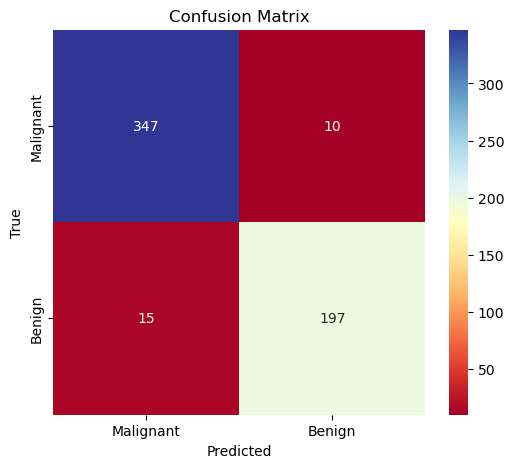

In [234]:
#get the confusion matrix

predictions = logreg.predict(X_pca)

conf_matrix = confusion_matrix(y, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [240]:
correct_predictions = sum(y == predictions) 
incorrect_predictions = sum(y != predictions)


print(f"Correct predictions: {correct_predictions}") #number of correct predictions 
print(f"Incorrect predictions: {incorrect_predictions}")


Number of benign points: 212
Number of malignant points: 357
Correct predictions: 544
Incorrect predictions: 25


In [241]:
#get accuracy of model
predictions = logreg.predict(X_pca)

accuracy = accuracy_score(y, predictions)


print(f"Model Accuracy: {accuracy * 100:}%")

Model Accuracy: 95.60632688927943%
